## Observations and Insights

Capomulin has the most datapoints to analyze and the lowest avg tumor volume size.<br>
The 'female:male' ratio among mice test subjects is close to 50/50 with a slightly higher male population.<br> 
Among Capomulin test subjects: mouse 'Weight' and 'Average Tumor Volume' have a strong positive relationship.<br>
A strong inverse relationship between 'Tumor Volume' and 'timepts' should indicate the effectiveness of the drug on the test subjects. See "mouse_id = 's185'"

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_mice = pd.merge(mouse_metadata, study_results, on='Mouse ID')
mice_df = merged_mice.rename({'Mouse ID':'MID', 'Drug Regimen':'Drug', 'Age_months':'Age_mo', 'Weight (g)':'Weight', 'Timepoint':'Timept', 'Tumor Volume (mm3)':'Volume', 'Metastatic Sites':'M_sites'}, axis=1)
mice_df2 = mice_df
mice_df3 = mice_df
mice_df4= mice_df
mice_df

,MID,Drug,Sex,Age_mo,Weight,Timept,Volume,M_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [3]:
tumor_vol_df = mice_df.groupby('Drug')['Volume'].describe()
#calculate median, variance, SEM, convert to DF, add each as a new column 
tumor_vol_df['median'] = pd.DataFrame(mice_df.groupby('Drug')['Volume'].median())
tumor_vol_df['var'] = pd.DataFrame(mice_df.groupby('Drug')['Volume'].var())
tumor_vol_df['sem'] = pd.DataFrame(mice_df.groupby('Drug')['Volume'].sem())

#keep count, .describe() gives mean, std--grab variables from DF
drug_summary = tumor_vol_df.loc[:,['count','mean','std','median','var','sem']]
drug_summary

,count,mean,std,median,var,sem
Drug,,,,,,
Capomulin,230.0,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,178.0,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,178.0,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,188.0,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,186.0,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,181.0,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,161.0,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,228.0,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,181.0,54.233149,7.710419,52.431737,59.450562,0.573111


In [4]:
#with Alexis
mice_mean = mice_df.groupby('Drug').mean()['Volume']
mice_median = mice_df.groupby('Drug').median()['Volume']
summary = pd.DataFrame({'Mean':mice_mean, 'Median': mice_median})
summary

,Mean,Median
Drug,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.322552,50.854632
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [5]:
drug_summary.reset_index(inplace=True)
drug_summary.columns

Index(['Drug', 'count', 'mean', 'std', 'median', 'var', 'sem'], dtype='object')

## Bar plots

#Generate a bar plot showing number of data points for each treatment regimen using pandas

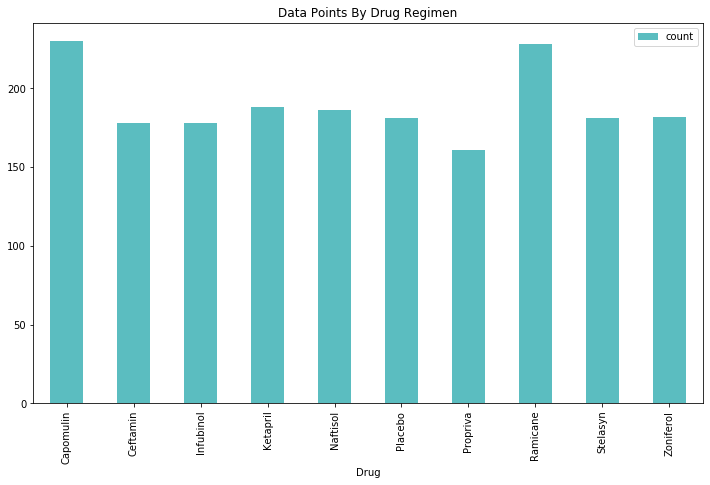

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = drug_summary[['Drug','count']]
data_points.set_index('Drug', inplace=True)

#Use DataFrame.plot() in order to create a bar chart of the data
data_points.plot(kind='bar', figsize=(12,7), color='#32adb1', alpha=0.8)
plt.title('Data Points By Drug Regimen')

plt.show()
plt.tight_layout()

#Generate a bar plot showing number of data points for each treatment regimen using pyplot

<module 'matplotlib.pyplot' from '/Users/claudiatrahan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

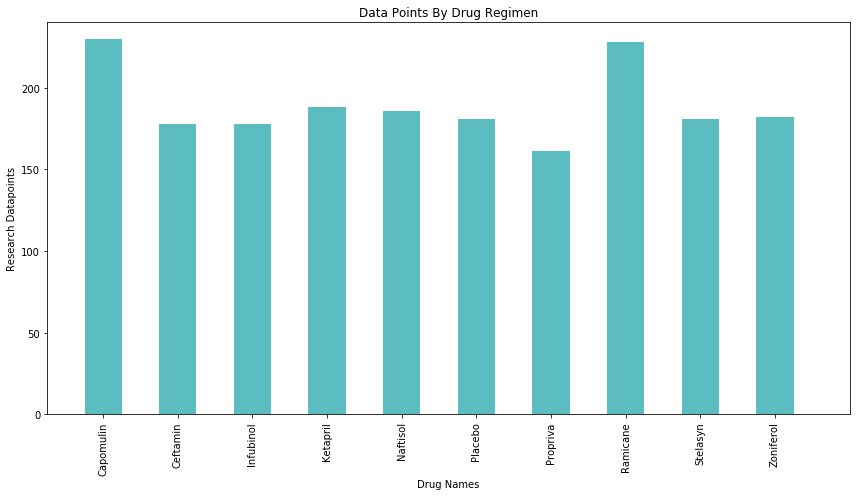

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#set axis and tick locations
x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]
#create list/ indicate where to write x lables/set figure size to adj for space
plt.figure(figsize=(12,7))
plt.bar(x_axis,data_points['count'], color='#32adb1', alpha=0.8, align='center', width=0.50)
plt.xticks(tick_locations,drug_summary['Drug'], rotation=90)
#set x and y limits
plt.xlim(-0.75,len(x_axis))
plt.ylim(0, max(data_points['count'])+10)
#set a title and lables
plt.title('Data Points By Drug Regimen')
plt.xlabel('Drug Names')
plt.ylabel('Research Datapoints')
plt.tight_layout()
#save and show graph
plt

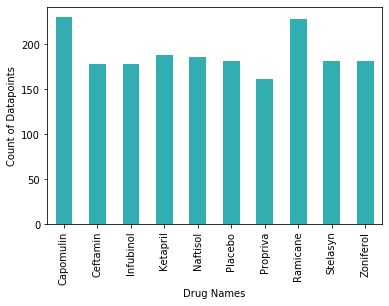

<Figure size 432x288 with 0 Axes>

In [8]:
drug_group = mice_df.groupby('Drug')
count_drug_group = drug_group['Volume'].count()
count_drug_group
# Set the xlabel and ylabel using class methods
drug_plot = count_drug_group.plot(kind='bar',color='#32adb1')
drug_plot.set_xlabel("Drug Names")
drug_plot.set_ylabel("Count of Datapoints")

plt.show()
plt.tight_layout()

## Pie plots

In [9]:
gender_df = pd.DataFrame(mouse_metadata.groupby('Sex')['Mouse ID'].count())
gender_df

,Mouse ID
Sex,
Female,124
Male,125


Text(0.5, 1.0, 'Test Subjects Gender Distribution')

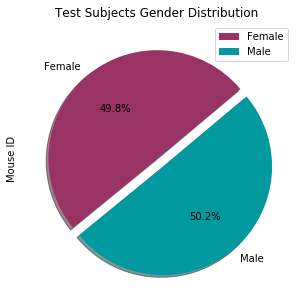

In [10]:
#plt.figure(figsize=(6,6))
ax1 = plt.subplot(111, aspect='equal')
gender_df.plot(kind='pie', y='Mouse ID', ax=ax1,figsize=(5,5), 
               colors=['#993366', '#00999e'], startangle=40, 
               explode= [0,0.09], shadow=True,  autopct="%1.1f%%")
plt.title("Test Subjects Gender Distribution")

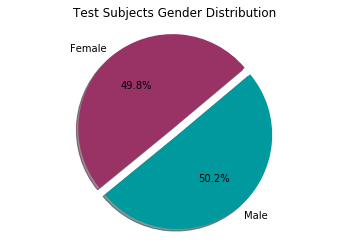

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline
#gender_df.reset_index('Sex', inplace=True)
gender_count = [124, 125]
labels = ['Female','Male']
colors = ['#993366', '#00999e']
explode = [0,0.09]
plt.title("Test Subjects Gender Distribution")
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

##Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

### Find Top Four

In [12]:
#group mice data by drug, describe summary stats of volumes
tumor_vol_df = mice_df.groupby('Drug')['Volume'].describe()

#sort vol by mean--smaller mean vol=more effective, sort data by mean ascending
#Results...Ramicane Capomulin Propriva Ceftamin
tumor_vol_df.sort_values(by='mean', inplace=True)
tumor_vol_df

,count,mean,std,min,25%,50%,75%,max
Drug,,,,,,,,
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817


In [13]:
#sort vol by mean--smaller mean vol=more effective, sort data by mean ascending
med_tumor_vol_df = mice_df.groupby('Drug')[['Drug','Volume']].median()
med_tumor_vol_df.sort_values(by='Volume')


,Volume
Drug,
Ramicane,40.673236
Capomulin,41.557809
Propriva,50.854632
Ceftamin,51.776157
Zoniferol,51.818479
Infubinol,51.820584
Placebo,52.288934
Stelasyn,52.431737
Naftisol,52.509285


###Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
mice_df2.sort_values('Drug', ascending=False,inplace=True)
new_columns = mice_df2.iloc[:,[0,1,5,6]]
#new_columns.reset_index(drop=True, inplace=True)
top_four = new_columns.loc[new_columns['Drug'].isin(['Ramicane','Capomulin','Propriva', 'Ceftamin'])].copy()
sorted_tf = top_four.sort_values(by=['MID','Timept'],ascending=False)
# dropping duplicates, keeping first value, should be the final volume per mouse
last_top_four = sorted_tf.drop_duplicates(subset='MID', keep='first').copy()
last_top_four

,MID,Drug,Timept,Volume
84,z578,Ramicane,45,30.638696
1862,z435,Propriva,10,48.710661
1855,y865,Ceftamin,45,64.729837
124,y793,Capomulin,45,31.896238
1845,y769,Ceftamin,45,68.594745
...,...,...,...,...
174,a644,Ramicane,45,32.978522
214,a520,Ramicane,45,38.810366
430,a444,Ramicane,45,43.047543
327,a411,Ramicane,45,38.407618


In [15]:
tf_df = last_top_four.sort_values(by=['Drug'])
tf_df.reset_index(inplace=True)
del tf_df['index']
Capomulin_list = tf_df[tf_df['Drug']=='Capomulin']['Volume'].copy()
Ceftamin_list = tf_df[tf_df['Drug']=='Ceftamin']['Volume'].copy()
Propriva_list = tf_df[tf_df['Drug']=='Propriva']['Volume'].copy()
Ramicane_list = tf_df[tf_df['Drug']=='Ramicane']['Volume'].copy()
Capomulin_list.sort_values(inplace=True)
Ceftamin_list.sort_values(inplace=True)
Propriva_list.sort_values(inplace=True)
Ramicane_list.sort_values(inplace=True)
st.normaltest(Ramicane_list.sample(20))

NormaltestResult(statistic=4.477533709126598, pvalue=0.10658986417434611)

##Generate a box plot of the final tumor volume of each mouse across four regimens of interest

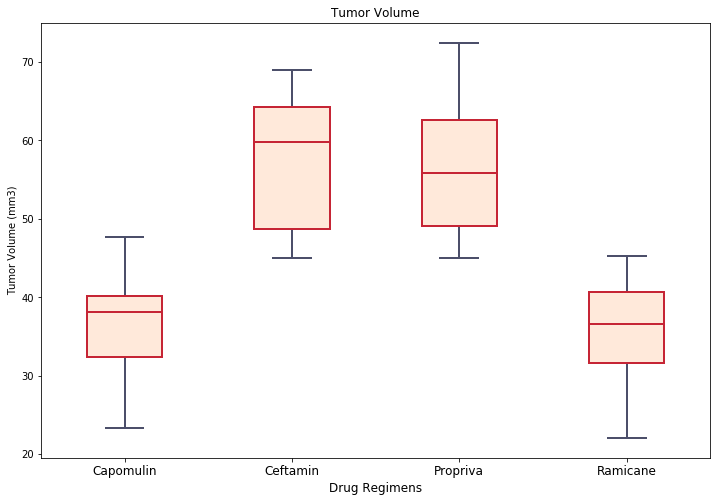

In [16]:
data_to_plot = [Capomulin_list, Ceftamin_list, Propriva_list, Ramicane_list]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=True, manage_ticks=True, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#c62535', linewidth=2)
    # change fill color
    box.set( facecolor = '#ffe9da' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#4c4f6a', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#4c4f6a', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#c62535', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
ax.set_title('Tumor Volume')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimens', size='large')
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Propriva', 'Ramicane'], size='large')
plt.show()

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#If the data is in a dataframe, we use pandas to give quartile calculations

#Capomulin

In [17]:
#Capomulin
quartiles = round(Capomulin_list.quantile([.25,.5,.75]),2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)
print(f"The lower quartile of tumor vol (Capomulin treated mice) is: {lowerq}")
print(f"The upper quartile of tumor vol (Capomulin treated mice) is: {upperq}")
print(f"The interquartile range of tumor vol (Capomulin treated mice) is: {iqr}")
print(f"The the median of tumor vol (Capomulin treated mice) is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor vol (Capomulin treated mice) is: 32.38
The upper quartile of tumor vol (Capomulin treated mice) is: 40.16
The interquartile range of tumor vol (Capomulin treated mice) is: 7.78
The the median of tumor vol (Capomulin treated mice) is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [18]:
#Ceftamin
quartiles = round(Ceftamin_list.quantile([.25,.5,.75]),2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)
print(f"The lower quartile of tumor vol (Ceftamin treated mice) is: {lowerq}")
print(f"The upper quartile of tumor vol (Ceftamin treated mice) is: {upperq}")
print(f"The interquartile range of tumor vol (Ceftamin treated mice) is: {iqr}")
print(f"The the median of tumor vol (Ceftamin treated mice) is: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor vol (Ceftamin treated mice) is: 48.72
The upper quartile of tumor vol (Ceftamin treated mice) is: 64.3
The interquartile range of tumor vol (Ceftamin treated mice) is: 15.58
The the median of tumor vol (Ceftamin treated mice) is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


#Propriva

In [19]:
#Propriva
quartiles = round(Propriva_list.quantile([.25,.5,.75]),2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)
print(f"The lower quartile of tumor vol (Propriva treated mice) is: {lowerq}")
print(f"The upper quartile of tumor vol (Propriva treated mice) is: {upperq}")
print(f"The interquartile range of tumor vol (Propriva treated mice) is: {iqr}")
print(f"The the median of tumor vol (Propriva treated mice) is: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor vol (Propriva treated mice) is: 49.12
The upper quartile of tumor vol (Propriva treated mice) is: 62.57
The interquartile range of tumor vol (Propriva treated mice) is: 13.45
The the median of tumor vol (Propriva treated mice) is: 55.84 
Values below 28.94 could be outliers.
Values above 82.745 could be outliers.


#Ramicane

In [20]:
#Ramicane
quartiles = round(Capomulin_list.quantile([.25,.5,.75]),2)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)
print(f"The lower quartile of tumor vol (Ramicane treated mice) is: {lowerq}")
print(f"The upper quartile of tumor vol (Ramicane treated mice) is: {upperq}")
print(f"The interquartile range of tumor vol (Ramicane treated mice) is: {iqr}")
print(f"The the median of tumor vol (Ramicane treated mice) is: {quartiles[0.5]} ")
lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor vol (Ramicane treated mice) is: 32.38
The upper quartile of tumor vol (Ramicane treated mice) is: 40.16
The interquartile range of tumor vol (Ramicane treated mice) is: 7.78
The the median of tumor vol (Ramicane treated mice) is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


## Line and scatter plots

##Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

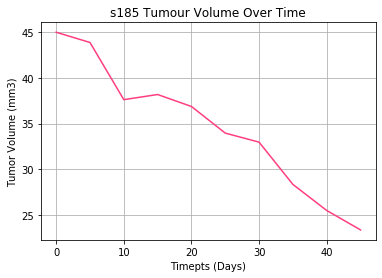

In [21]:
mouse_id = 's185'
# Collect the trips of the 'mouseid' above
capo_mouse = new_columns.loc[new_columns['Drug'].isin(['Capomulin'])].copy()
s185_data = capo_mouse[capo_mouse['MID']=='s185'][['MID','Timept','Volume']]
s185_data.sort_values('Timept', ascending=True, inplace=True)
x_axis = s185_data['Timept']
y_axis = s185_data['Volume']
plt.xlabel('Timepts (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis,y_axis, color='#ff3d7f')
plt.title('s185 Tumour Volume Over Time')

plt.grid()
plt.show()

##Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [22]:
capomulin_mice = mice_df3[mice_df3['Drug']=='Capomulin']
mice_df3.set_index('Drug', inplace=True)
capomulin_mice_2 = mice_df3.loc['Capomulin']
capo_weight_vol = capomulin_mice_2.groupby('MID')[['Weight', 'Volume']].mean()
capo_weight_vols=capo_weight_vol.sort_values('Weight',ascending=True)
weight = capo_weight_vols.Weight
volume = capo_weight_vols.Volume


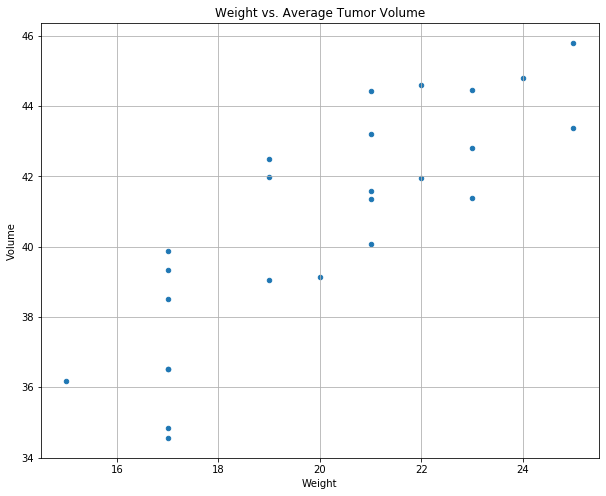

In [23]:
%matplotlib inline
capo_weight_vols.plot(kind='scatter', x='Weight', y='Volume', 
                     grid=True, figsize=(10,8), title='Weight vs. Average Tumor Volume')
plt.show()

#Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

In [24]:
print(f"The correlation coefficient between mouse weight and avg tumor volume is {round(st.pearsonr(weight,volume)[0],2)}")

The correlation coefficient between mouse weight and avg tumor volume is 0.84


In [25]:
#elements of linregression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
#line equation
cap_fit = weight * slope + intercept
cap_fit

MID
x401    35.868756
y793    37.777635
u364    37.777635
f966    37.777635
t565    37.777635
s185    37.777635
r554    37.777635
m601    37.777635
l897    39.686515
m957    39.686515
g288    39.686515
i738    40.640954
j246    41.595394
b742    41.595394
v923    41.595394
w914    41.595394
l509    41.595394
g316    42.549834
b128    42.549834
j119    43.504273
s710    43.504273
w150    43.504273
i557    44.458713
r157    45.413153
r944    45.413153
Name: Weight, dtype: float64

#Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The r-squared is: 0.841936342469472


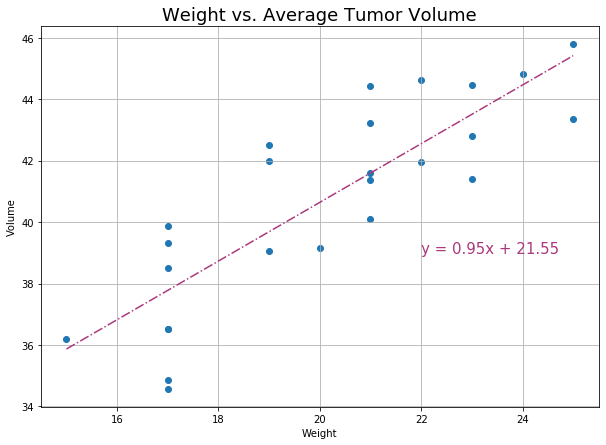

In [26]:
%matplotlib inline
weight = capo_weight_vols.Weight
volume = capo_weight_vols.Volume
plt.rcParams["figure.figsize"] = (10,7)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
cap_fit = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,cap_fit,"-.", color='#aa387b')
plt.annotate(line_eq,(22,39),fontsize=15,color="#aa387b")
plt.title('Weight vs. Average Tumor Volume', fontsize=18)
plt.grid()
plt.xlabel('Weight')
plt.ylabel('Volume')
print(f"The r-squared is: {rvalue}")
plt.show()